<a href="https://colab.research.google.com/github/aayush14377pande/ML_Repo/blob/main/ML_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Decision Tree on Iris Dataset
### By: Aayush Pande


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [8]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Folder/Iris.csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['Species']=df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

<ipython-input-14-b0659d577101>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']=df['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})


In [15]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],df['Species'], test_size = 0.2)

In [17]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
100,6.3,3.3,6.0,2.5
35,5.0,3.2,1.2,0.2
12,4.8,3.0,1.4,0.1
84,5.4,3.0,4.5,1.5
...,...,...,...,...
50,7.0,3.2,4.7,1.4
69,5.6,2.5,3.9,1.1
111,6.4,2.7,5.3,1.9
112,6.8,3.0,5.5,2.1


In [18]:
Y_train

,Species
114,3
100,3
35,1
12,1
84,2
...,...
50,2
69,2
111,3
112,3


In [19]:
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       random_state=100)

In [20]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([2, 2, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 3, 2,
       2, 1, 2, 1, 3, 3, 2, 1])

In [21]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  6]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

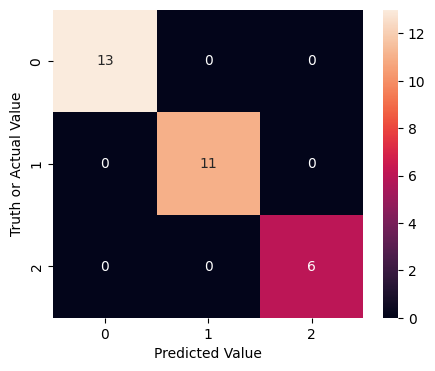

In [22]:
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot =True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [23]:
print("Accuracy of log_reg: ", accuracy_score(Y_test,y_pred))
print("Precision of log reg: ", precision_score(Y_test, y_pred, average="weighted"))
print('F1 score of log_reg: ', f1_score(Y_test, y_pred, average="weighted"))
print("Report of log_reg: ", metrics.classification_report(Y_test, y_pred))

Accuracy of log_reg:  1.0
Precision of log reg:  1.0
F1 score of log_reg:  1.0
Report of log_reg:                precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



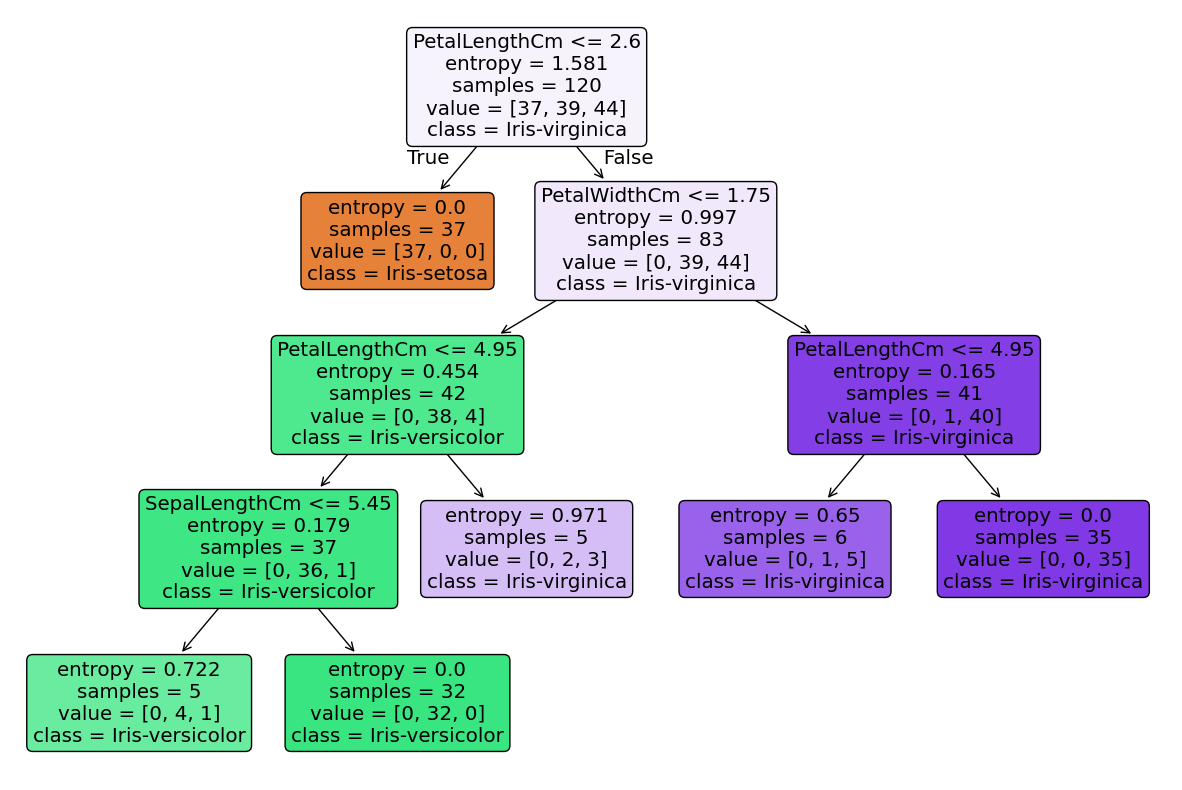

In [24]:
df['Species']=df['Species'].replace({1: 'Iris-setosa', 2:'Iris-versicolor', 3:'Iris-virginica'})
# Function to plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_entropy, filled=True, feature_names=X_train.columns, class_names=df['Species'].unique(), rounded=True)
plt.show()